In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
from shared.pipelines import get_keras_pipeline
from shared.data import load_fine_food_reviews

In [7]:
import en_vectors_web_lg
nlp = en_vectors_web_lg.load()

In [8]:
MAX_WORDS_IN_SENTENCE = 200
LIMIT = -1
model_path = '../dist/models/food_{}.h5'.format(LIMIT if LIMIT > 0 else 'all')

In [9]:
import matplotlib.pyplot as plt
from keras import models


def plot_training(history):
    plt.plot(history.history['loss'], c='red')
    _ = plt.plot(history.history['val_loss'], c='blue')


def train_model(limit, max_words_in_sentence, **train_params):
    X, y = load_fine_food_reviews(limit)
    pipeline = get_keras_pipeline(nlp, max_words_in_sentence, **train_params).fit(X, y)
    model_step = pipeline.steps[-1][1]
    plot_training(model_step.history)
    return model_step.model


def load_or_train_model(model_path, limit, max_words_in_sentence, **train_params):
    try:
        print("Loading cached model...")
        return models.load_model(model_path)
    except:
        print("Unable to find cached model, training...")
        model = train_model(limit, max_words_in_sentence, **train_params)
        models.save_model(model, model_path)
        return model

Loading cached model...
Unable to find cached model, training...
Epoch 1/5
3081/3081 [==============================] - 120s 39ms/step - loss: 0.5008 - acc: 0.7674 - val_loss: 0.1547 - val_acc: 0.8690
Epoch 2/5
3081/3081 [==============================] - 135s 44ms/step - loss: 0.1361 - acc: 0.8666 - val_loss: 0.1307 - val_acc: 0.8745
Epoch 3/5
3081/3081 [==============================] - 130s 42ms/step - loss: 0.1104 - acc: 0.8702 - val_loss: 0.1040 - val_acc: 0.8762
Epoch 4/5
3081/3081 [==============================] - 117s 38ms/step - loss: 0.1065 - acc: 0.8707 - val_loss: 0.1024 - val_acc: 0.8755
Epoch 5/5
3081/3081 [==============================] - 137s 45ms/step - loss: 0.1061 - acc: 0.8706 - val_loss: 0.1017 - val_acc: 0.8761


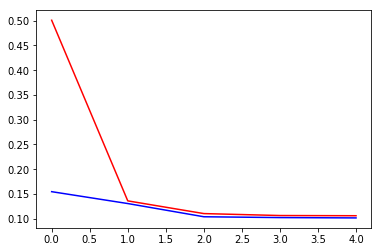

In [10]:
model = load_or_train_model(model_path, limit=LIMIT, max_words_in_sentence=MAX_WORDS_IN_SENTENCE)
pipeline = get_keras_pipeline(nlp, model=model, max_words_in_sentence=MAX_WORDS_IN_SENTENCE)

In [13]:
import numpy as np

pipeline.predict(np.array([
    "it was very good",
    "can't even smell it",
    "expectations met",
    "tasty",
], dtype='object'))

array([[ 0.78920048],
       [ 0.51199126],
       [ 0.60853308],
       [ 0.78920048]], dtype=float32)